In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df_test= pd.read_excel("Test_set.xlsx")

FileNotFoundError: [Errno 2] No such file or directory: 'Test_set.xlsx'

In [ ]:
df_test.head(3)

In [4]:
df_train=pd.read_excel("Data_Train.xlsx")

In [5]:
df_train.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [6]:
df=df_train.append(df_test)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2352\3238464827.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df_train.append(df_test)


In [7]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0


In [8]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [9]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2661, 2662, 2663, 2664, 2665, 2666, 2667, 2668, 2669, 2670],
           dtype='int64', length=13354)

In [10]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [12]:
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

In [13]:
## features engg.
df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [14]:
df["Date_of_Journey"].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

In [15]:
df["Date_of_Journey"].str.split("/")

0       [24, 03, 2019]
1        [1, 05, 2019]
2        [9, 06, 2019]
3       [12, 05, 2019]
4       [01, 03, 2019]
             ...      
2666     [6, 06, 2019]
2667    [27, 03, 2019]
2668     [6, 03, 2019]
2669     [6, 03, 2019]
2670    [15, 06, 2019]
Name: Date_of_Journey, Length: 13354, dtype: object

In [16]:
df["date"]=df["Date_of_Journey"].str.split("/").str[0]
df["month"]=df["Date_of_Journey"].str.split("/").str[1]
df["year"]=df["Date_of_Journey"].str.split("/").str[2]
## here we can use lambda function
#df["Date"]=df['Date_of_Journey'].apply(lambda x:x.split("/")[0])
#df["Month"]=df['Date_of_Journey'].apply(lambda x:x.split("/")[1])
#df["Year"]=df['Date_of_Journey'].apply(lambda x:x.split("/")[2])

In [17]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019


In [18]:
df.drop("Date_of_Journey",axis=1,inplace=True)

In [19]:
df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019


In [20]:
df["Arrival_Time"].unique()

array(['01:10 22 Mar', '13:15', '04:25 10 Jun', ..., '00:20 07 Mar',
       '00:20 02 Apr', '07:45 13 May'], dtype=object)

In [21]:
df["Arrival_Time"]=df["Arrival_Time"].apply(lambda x:x.split(" ")[0])
df["Arrival_Time"]

0       01:10
1       13:15
2       04:25
3       23:30
4       21:35
        ...  
2666    20:25
2667    16:55
2668    04:25
2669    19:15
2670    19:15
Name: Arrival_Time, Length: 13354, dtype: object

In [22]:
df["arrival_hour"]=df["Arrival_Time"].apply(lambda x:x.split(":")[0])
df["arrival_min"]=df["Arrival_Time"].apply(lambda x:x.split(":")[1])

In [23]:
df.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year,arrival_hour,arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,03,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,06,2019,04,25


In [24]:
df["Dep_Time"].unique()

array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35', '15:05', '14:15', '06:45', '20:55', '11:10',
       '05:45', '19:00', '23:05', '11:00', '09:35', '21:15', '23:55',
       '19:45', '08:50', '15:40', '06:05', '15:00', '13:55', '05:55',
       '13:20', '05:05', '06:25', '17:30', '08:20', '19:55', '06:30',
       '14:05', '02:00', '09:40', '08:25', '20:25', '13:15', '02:15',
       '16:55', '20:45', '05:15', '19:50', '20:00', '06:10', '19:30',
       '04:45', '12:55', '18:15', '17:20', '15:25', '23:00', '12:00',
       '14:45', '11:50', '11:30', '14:40', '19:10', '06:00', '23:30',
       '07:35', '13:05', '12:30', '15:10', '12:50', '18:25', '16:30',
       '00:40', '06:50', '13:00', '19:15', '01:30', '17:00', '10:00',
       '19:35', '15:

In [25]:
df["Dep_hour"]=df["Dep_Time"].str.split(":").str[0]
df["Dep_min"]=df["Dep_Time"].str.split(":").str[1]


In [26]:
df.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year,arrival_hour,arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,03,2019,01,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019,13,15,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,06,2019,04,25,09,25


In [27]:
df["Duration"].unique()

array(['2h 50m', '7h 25m', '19h', '5h 25m', '4h 45m', '2h 25m', '15h 30m',
       '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m',
       '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h', '20h 35m',
       '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m', '5h 45m',
       '5h 55m', '13h 25m', '22h', '5h 30m', '10h 25m', '5h 15m',
       '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m',
       '2h 45m', '12h', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '3h',
       '16h 15m', '15h 5m', '6h 30m', '25h 5m', '12h 25m', '27h 20m',
       '10h 15m', '10h 30m', '1h 30m', '1h 25m', '26h 30m', '7h 20m',
       '13h 30m', '5h', '19h 5m', '14h 50m', '2h 40m', '22h 10m',
       '9h 35m', '10h', '21h 20m', '18h 45m', '12h 20m', '18h', '9h 15m',
       '17h 30m', '16h 35m', '12h 15m', '7h 30m', '24h', '8h 55m',
       '7h 10m', '14h 30m', '30h 20m', '15h', '12h 45m', '10h 10m',
       '15h 25m', '14h 5m', '20h 15m', '23h 10m', '18h 10m', '16h',
       '2h 20m', '8h', '16h 5

In [28]:
df["Duration_Hour"]=df["Duration"].str.split("h").str[0]
df["Duration_Hour"]

0        2
1        7
2       19
3        5
4        4
        ..
2666    23
2667     2
2668     6
2669    15
2670    14
Name: Duration_Hour, Length: 13354, dtype: object

In [29]:
df["duration_min"]=df["Duration"].str.split("h").str[1]


In [30]:
df["duration_min"]

0        50m
1        25m
2           
3        25m
4        45m
        ... 
2666     55m
2667     35m
2668     35m
2669     15m
2670     20m
Name: duration_min, Length: 13354, dtype: object

In [31]:
df["duration_min"]=df["duration_min"].str.replace("m","")

In [32]:
df["duration_min"]

0        50
1        25
2          
3        25
4        45
       ... 
2666     55
2667     35
2668     35
2669     15
2670     20
Name: duration_min, Length: 13354, dtype: object

In [33]:
df.head(5)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,year,arrival_hour,arrival_min,Dep_hour,Dep_min,Duration_Hour,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,03,2019,01,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019,13,15,05,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,06,2019,04,25,09,25,19,
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019,23,30,18,05,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019,21,35,16,50,4,45


In [34]:
df.drop(["Route","Dep_Time","Arrival_Time","Duration"],axis=1,inplace=True)

In [35]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,month,year,arrival_hour,arrival_min,Dep_hour,Dep_min,Duration_Hour,duration_min
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897.0,24,03,2019,01,10,22,20,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662.0,1,05,2019,13,15,05,50,7,25


In [36]:
df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [37]:
df["Total_Stops"]=df["Total_Stops"].replace({'nan':0,'non-stop':1,'1 stop':2,'2 stops':3,'3 stops':4,'4 stops':5,})

In [38]:
df["Total_Stops"].unique()

array([ 1.,  3.,  2.,  4., nan,  5.])

In [39]:
df.isnull().sum()

Airline               0
Source                0
Destination           0
Total_Stops           1
Additional_Info       0
Price              2671
date                  0
month                 0
year                  0
arrival_hour          0
arrival_min           0
Dep_hour              0
Dep_min               0
Duration_Hour         0
duration_min          2
dtype: int64

In [40]:
df["duration_min"].unique()

array([' 50', ' 25', '', ' 45', ' 30', ' 5', ' 15', ' 35', ' 10', ' 20',
       ' 55', ' 40', nan], dtype=object)

In [41]:
df["duration_min"].mode()

0     30
Name: duration_min, dtype: object

In [42]:
df["duration_min"]=df["duration_min"].fillna(df["duration_min"].mode()[0])

In [43]:
df["duration_min"].unique()

array([' 50', ' 25', '', ' 45', ' 30', ' 5', ' 15', ' 35', ' 10', ' 20',
       ' 55', ' 40'], dtype=object)

In [45]:
df["duration_min"].unique()

array([' 50', ' 25', '', ' 45', ' 30', ' 5', ' 15', ' 35', ' 10', ' 20',
       ' 55', ' 40'], dtype=object)

In [46]:
df.head(8)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,date,month,year,arrival_hour,arrival_min,Dep_hour,Dep_min,Duration_Hour,duration_min
0,IndiGo,Banglore,New Delhi,1.0,No info,3897.0,24,03,2019,01,10,22,20,2,50
1,Air India,Kolkata,Banglore,3.0,No info,7662.0,1,05,2019,13,15,05,50,7,25
2,Jet Airways,Delhi,Cochin,3.0,No info,13882.0,9,06,2019,04,25,09,25,19,
3,IndiGo,Kolkata,Banglore,2.0,No info,6218.0,12,05,2019,23,30,18,05,5,25
4,IndiGo,Banglore,New Delhi,2.0,No info,13302.0,01,03,2019,21,35,16,50,4,45
5,SpiceJet,Kolkata,Banglore,1.0,No info,3873.0,24,06,2019,11,25,09,00,2,25
6,Jet Airways,Banglore,New Delhi,2.0,In-flight meal not included,11087.0,12,03,2019,10,25,18,55,15,30
7,Jet Airways,Banglore,New Delhi,2.0,No info,22270.0,01,03,2019,05,05,08,00,21,5


In [47]:
df.shape

(13354, 15)

In [51]:
df.drop(["Additional_Info"],axis=1,inplace=True)

In [52]:
df.head(6)

,Airline,Source,Destination,Total_Stops,Price,date,month,year,arrival_hour,arrival_min,Dep_hour,Dep_min,Duration_Hour,duration_min
0,IndiGo,Banglore,New Delhi,1.0,3897.0,24,03,2019,01,10,22,20,2,50
1,Air India,Kolkata,Banglore,3.0,7662.0,1,05,2019,13,15,05,50,7,25
2,Jet Airways,Delhi,Cochin,3.0,13882.0,9,06,2019,04,25,09,25,19,
3,IndiGo,Kolkata,Banglore,2.0,6218.0,12,05,2019,23,30,18,05,5,25
4,IndiGo,Banglore,New Delhi,2.0,13302.0,01,03,2019,21,35,16,50,4,45
5,SpiceJet,Kolkata,Banglore,1.0,3873.0,24,06,2019,11,25,09,00,2,25


In [55]:
df=pd.get_dummies(data=df,columns=["Airline","Source","Destination"],drop_first=True)

In [56]:
df.head(3)

,Total_Stops,Price,date,month,year,arrival_hour,arrival_min,Dep_hour,Dep_min,Duration_Hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1.0,3897.0,24,03,2019,01,10,22,20,2,...,0,0,0,0,0,0,0,0,0,1
1,3.0,7662.0,1,05,2019,13,15,05,50,7,...,0,0,0,1,0,0,0,0,0,0
2,3.0,13882.0,9,06,2019,04,25,09,25,19,...,0,0,1,0,0,1,0,0,0,0


In [57]:
df.isnull().sum()

Total_Stops                                     1
Price                                        2671
date                                            0
month                                           0
year                                            0
arrival_hour                                    0
arrival_min                                     0
Dep_hour                                        0
Dep_min                                         0
Duration_Hour                                   0
duration_min                                    0
Airline_Air India                               0
Airline_GoAir                                   0
Airline_IndiGo                                  0
Airline_Jet Airways                             0
Airline_Jet Airways Business                    0
Airline_Multiple carriers                       0
Airline_Multiple carriers Premium economy       0
Airline_SpiceJet                                0
Airline_Trujet                                  0


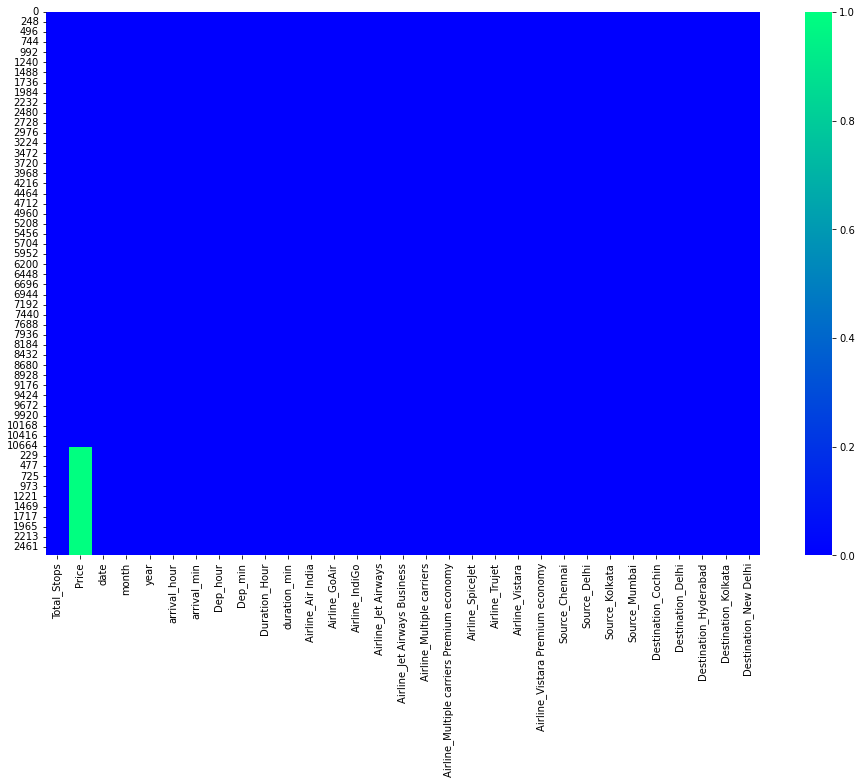

In [59]:
plt.figure(figsize=(16,10))
sns.heatmap(df.isnull(),cmap="winter")
plt.show()

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Total_Stops                                13353 non-null  float64
 1   Price                                      10683 non-null  float64
 2   date                                       13354 non-null  object 
 3   month                                      13354 non-null  object 
 4   year                                       13354 non-null  object 
 5   arrival_hour                               13354 non-null  object 
 6   arrival_min                                13354 non-null  object 
 7   Dep_hour                                   13354 non-null  object 
 8   Dep_min                                    13354 non-null  object 
 9   Duration_Hour                              13354 non-null  object 
 10  duration_min           

In [63]:
for k in df.keys():
    if "uint" in str(df[k].dtype) and df[k].max()<=255:
        df[k]=df[k].astype("int8")

In [64]:
for k in df.keys():
    if "float" in str(df[k].dtype) and df[k].max()<=255:
        df[k]=df[k].astype("float16")

In [75]:
##

In [74]:
df["date"]=df["date"].astype("int8")
df["month"]=df["month"].astype("int8")
df["year"]=df["year"].astype("int8")
df["arrival_hour"]=df["arrival_hour"].astype("int8")
df["arrival_min"]=df["arrival_min"].astype("int8")
df["Dep_hour"]=df["Dep_hour"].astype("int8")
df["Dep_min"]=df["Dep_min"].astype("int8")

